# Assignment 3 

# Dataset

In [22]:
# Splitting the dataset
import splitfolders
route = '/flowers'
splitfolders.ratio(route , 
                  output = 'dataset' ,
                  seed = 42,
                  ratio = (.7 , .2 , .1) ,
                  group_prefix = None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 2 files [00:00,  9.57 files/s]
Copying files: 5 files [00:00, 17.02 files/s]
Copying files: 7 files [00:00, 18.07 files/s]
Copying files: 11 files [00:00, 23.97 files/s]
Copying files: 15 files [00:00, 26.69 files/s]
Copying files: 18 files [00:00, 25.74 files/s]
Copying files: 21 files [00:00, 24.02 files/s]
Copying files: 25 files [00:01, 27.11 files/s]
Copying files: 28 files [00:01, 26.72 files/s]
Copying files: 31 files [00:01, 24.58 files/s]
Copying files: 34 files [00:01, 23.16 files/s]
Copying files: 37 files [00:01, 23.74 files/s]
Copying files: 40 files [00:01, 25.11 files/s]
Copying files: 43 files [00:01, 23.31 files/s]
Copying files: 46 files [00:01, 22.85 files/s]
Copying files: 49 files [00:02, 22.07 files/s]
Copying files: 52 files [00:02, 21.11 files/s]
Copying files: 55 files [00:02, 22.54 files/s]
Copying files: 58 files [00:02, 22.32 files/s]
Copying files: 62 files [00:02, 24.61 files/s]
Copying files: 65 fi

Copying files: 865 files [00:20, 42.24 files/s]
Copying files: 870 files [00:20, 40.80 files/s]
Copying files: 875 files [00:20, 39.42 files/s]
Copying files: 880 files [00:20, 37.37 files/s]
Copying files: 884 files [00:20, 36.28 files/s]
Copying files: 888 files [00:21, 34.88 files/s]
Copying files: 893 files [00:21, 37.30 files/s]
Copying files: 897 files [00:21, 36.43 files/s]
Copying files: 901 files [00:21, 37.10 files/s]
Copying files: 905 files [00:21, 35.36 files/s]
Copying files: 909 files [00:21, 33.65 files/s]
Copying files: 913 files [00:21, 34.86 files/s]
Copying files: 917 files [00:21, 32.57 files/s]
Copying files: 923 files [00:22, 38.14 files/s]
Copying files: 927 files [00:22, 38.30 files/s]
Copying files: 933 files [00:22, 42.20 files/s]
Copying files: 938 files [00:22, 43.56 files/s]
Copying files: 943 files [00:22, 41.65 files/s]
Copying files: 948 files [00:22, 39.90 files/s]
Copying files: 953 files [00:22, 40.68 files/s]
Copying files: 958 files [00:22, 40.11 f

Copying files: 1833 files [00:40, 41.66 files/s]
Copying files: 1838 files [00:40, 40.41 files/s]
Copying files: 1843 files [00:40, 36.77 files/s]
Copying files: 1847 files [00:40, 36.53 files/s]
Copying files: 1851 files [00:40, 36.07 files/s]
Copying files: 1855 files [00:40, 36.47 files/s]
Copying files: 1860 files [00:40, 37.36 files/s]
Copying files: 1864 files [00:41, 36.65 files/s]
Copying files: 1868 files [00:41, 34.96 files/s]
Copying files: 1872 files [00:41, 35.01 files/s]
Copying files: 1877 files [00:41, 37.08 files/s]
Copying files: 1881 files [00:41, 27.30 files/s]
Copying files: 1885 files [00:41, 29.98 files/s]
Copying files: 1889 files [00:41, 30.56 files/s]
Copying files: 1893 files [00:42, 32.71 files/s]
Copying files: 1897 files [00:42, 31.29 files/s]
Copying files: 1901 files [00:42, 31.94 files/s]
Copying files: 1905 files [00:42, 32.25 files/s]
Copying files: 1909 files [00:42, 28.12 files/s]
Copying files: 1912 files [00:42, 28.13 files/s]
Copying files: 1917 

Copying files: 2739 files [00:59, 38.41 files/s]
Copying files: 2743 files [00:59, 37.14 files/s]
Copying files: 2749 files [01:00, 41.48 files/s]
Copying files: 2754 files [01:00, 40.89 files/s]
Copying files: 2759 files [01:00, 36.13 files/s]
Copying files: 2764 files [01:00, 36.61 files/s]
Copying files: 2768 files [01:00, 33.44 files/s]
Copying files: 2775 files [01:00, 40.40 files/s]
Copying files: 2781 files [01:00, 44.23 files/s]
Copying files: 2786 files [01:00, 42.31 files/s]
Copying files: 2791 files [01:01, 41.18 files/s]
Copying files: 2796 files [01:01, 40.87 files/s]
Copying files: 2802 files [01:01, 43.87 files/s]
Copying files: 2807 files [01:01, 35.83 files/s]
Copying files: 2812 files [01:01, 38.62 files/s]
Copying files: 2819 files [01:01, 43.36 files/s]
Copying files: 2824 files [01:01, 44.94 files/s]
Copying files: 2829 files [01:01, 45.45 files/s]
Copying files: 2834 files [01:02, 45.61 files/s]
Copying files: 2841 files [01:02, 50.14 files/s]
Copying files: 2847 

Copying files: 3638 files [01:20, 43.68 files/s]
Copying files: 3644 files [01:21, 45.56 files/s]
Copying files: 3649 files [01:21, 42.90 files/s]
Copying files: 3654 files [01:21, 40.81 files/s]
Copying files: 3661 files [01:21, 43.67 files/s]
Copying files: 3666 files [01:21, 43.43 files/s]
Copying files: 3671 files [01:21, 43.85 files/s]
Copying files: 3676 files [01:21, 44.67 files/s]
Copying files: 3681 files [01:21, 44.20 files/s]
Copying files: 3686 files [01:22, 38.44 files/s]
Copying files: 3691 files [01:22, 40.77 files/s]
Copying files: 3696 files [01:22, 40.79 files/s]
Copying files: 3703 files [01:22, 46.58 files/s]
Copying files: 3708 files [01:22, 42.92 files/s]
Copying files: 3714 files [01:22, 45.89 files/s]
Copying files: 3722 files [01:22, 52.83 files/s]
Copying files: 3728 files [01:23, 40.90 files/s]
Copying files: 3733 files [01:23, 42.79 files/s]
Copying files: 3738 files [01:23, 42.60 files/s]
Copying files: 3743 files [01:23, 33.75 files/s]
Copying files: 3747 

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

## Data augmentation

In [3]:
# Data augmentaion on training variable

train_datagen = ImageDataGenerator(rescale = 1./255 , zoom_range = 0.2 , horizontal_flip = True )

In [4]:
# Data augmentation on testing varibale

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Data augmentation on training data

xtrain = train_datagen.flow_from_directory('dataset/train/' , 
                                           target_size = (64,64) , 
                                           class_mode = 'categorical' , 
                                           batch_size=100)

Found 3019 images belonging to 5 classes.


In [6]:
# Data augmentation on testing data

xtest = test_datagen.flow_from_directory('dataset/test/',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 438 images belonging to 5 classes.


## Model Building

In [7]:
# Initializing the sequential model
model = Sequential()

# Convolutional layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

# Maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Hidden layer 1
model.add(Dense(64,activation='relu'))

# Hidden layer 2
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(5,activation='softmax')) # output

## Compiling the model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [9]:
out=model.fit(xtrain,
              epochs=50,
              validation_data = xtest,
              validation_steps = len(xtest))

Epoch 1/50
31/31 [==============================] - 61s 2s/step - loss: 1.6898 - accuracy: 0.2719 - val_loss: 1.4132 - val_accuracy: 0.3904
Epoch 2/50
31/31 [==============================] - 21s 668ms/step - loss: 1.3315 - accuracy: 0.4478 - val_loss: 1.2522 - val_accuracy: 0.4521
Epoch 3/50
31/31 [==============================] - 20s 654ms/step - loss: 1.1934 - accuracy: 0.4919 - val_loss: 1.1579 - val_accuracy: 0.5046
Epoch 4/50
31/31 [==============================] - 20s 657ms/step - loss: 1.1159 - accuracy: 0.5465 - val_loss: 1.2937 - val_accuracy: 0.4726
Epoch 5/50
31/31 [==============================] - 20s 646ms/step - loss: 1.0999 - accuracy: 0.5621 - val_loss: 1.1648 - val_accuracy: 0.5320
Epoch 6/50
31/31 [==============================] - 20s 634ms/step - loss: 1.0546 - accuracy: 0.5846 - val_loss: 1.0758 - val_accuracy: 0.5822
Epoch 7/50
31/31 [==============================] - 20s 641ms/step - loss: 1.0072 - accuracy: 0.6058 - val_loss: 1.0519 - val_accuracy: 0.5845
Ep

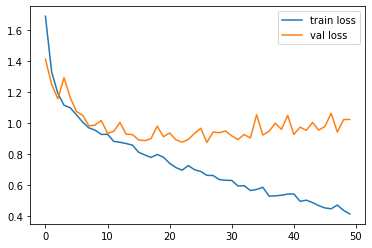

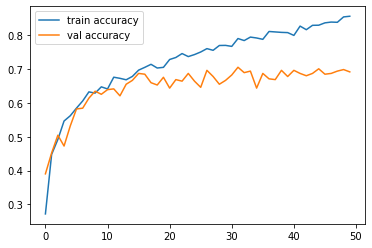

In [11]:
#plot the loss
plt.plot(out.history['loss'], label='train loss')
plt.plot(out.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(out.history['accuracy'], label='train accuracy')
plt.plot(out.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 64)                1968192   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                        

## Save the model

In [13]:
model.save('flower.h5')

## Testing the model

In [14]:
# Creating list
flow = ['daisy','dandelion','rose','sunflower','tulip']
def tester(img):
    img = image.load_img(img,target_size=(64,64))
    # Converting images into array
    x = image.img_to_array(img)
    # Expanding the dimensions
    x = np.expand_dims(x,axis=0)
    # Predicting the higher probability index
    pred = np.argmax(model.predict(x))
    return print("Predicted class : ",flow[pred])

# Showing image 
def show(img):
    img = image.load_img(img,target_size=(64,64))
    plt.imshow(img)


## Testing using flower images

Predicted class :  tulip


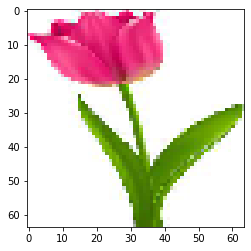

In [15]:
tester('flower1.jpg')
show('flower1.jpg')

Predicted class :  sunflower


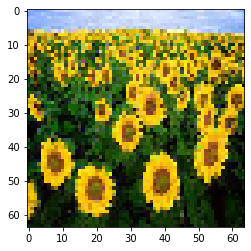

In [16]:
tester('flower2.jpg')
show('flower2.jpg')

Predicted class :  tulip


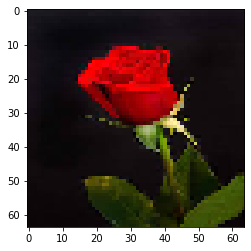

In [17]:
tester('flower4.jpg')
show('flower4.jpg')

Predicted class :  daisy


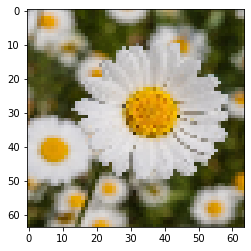

In [18]:
tester('flower5.jpg')
show('flower5.jpg')

## Inference

* The dataset comprises of five different classes of flowers with 4317 images
* The dataset is divided as 70% for training and 30% for testing and validation
* Model was built using Convolutional Neural network
* Accuracy : 85%
* Validation accuracy : 69%
* Testing accuracy : 90%




 